In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import io
import math
from scipy.optimize import curve_fit

In [2]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400)

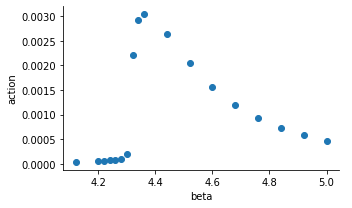

In [3]:
path = '../data/SU3_gluodynamics'

data_0 = pd.read_csv(f'{path}/beta_actS_0.txt', sep=' ', header = 0, names = ['beta', 'action', 'err'])

data_T = pd.read_csv(f'{path}/beta_actS_T.txt', sep=' ', header = 0, names = ['beta', 'action', 'err'])

data_0['action'] = data_0['action'] - data_T['action']
data_0['err'] = np.sqrt(data_0['err']**2 + data_T['err']**2)


fg = seaborn.FacetGrid(data=data_0,  aspect=1.61)
fg.map(plt.errorbar, 'beta', 'action', 'err', marker="o", fmt='', linestyle = '').add_legend()

save_image('../images/SU3_gluodynamics', 'action_difference', fg)